In [1]:
import pandas as pd

df=pd.read_csv("house_price_prediction.csv")
print(df.info())
print(df.describe())
print(df.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   avg_income          5009 non-null   float64
 1   avg_area_house_age  5010 non-null   float64
 2   avg_area_num_rooms  5011 non-null   float64
 3   avg_bedrooms        5012 non-null   float64
 4   avg_population      5009 non-null   float64
 5   price               5012 non-null   float64
 6   address             5011 non-null   object 
dtypes: float64(6), object(1)
memory usage: 274.2+ KB
None
          avg_income  avg_area_house_age  avg_area_num_rooms  avg_bedrooms  \
count    5009.000000         5010.000000         5011.000000   5012.000000   
mean    68577.804938            5.977508            6.987906      3.982095   
std     10661.033166            0.991472            1.006453      1.233945   
min     17796.631190            2.644304            3.236194      2.000000   
25% 

In [3]:
print(df.isnull().sum())

avg_income            3
avg_area_house_age    2
avg_area_num_rooms    1
avg_bedrooms          0
avg_population        3
price                 0
address               1
dtype: int64


In [9]:
df["address"] = df["address"].fillna("Bangalore")

In [11]:
df.drop(columns=['address'], inplace=True)

In [29]:
print(df.columns)


Index(['avg_income', 'avg_area_house_age', 'avg_area_num_rooms',
       'avg_bedrooms', 'avg_population', 'price'],
      dtype='object')


In [31]:
df.fillna(df.median(numeric_only=True), inplace=True)
print(df.isnull().sum())

avg_income            0
avg_area_house_age    0
avg_area_num_rooms    0
avg_bedrooms          0
avg_population        0
price                 0
dtype: int64


In [2]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   avg_income          5009 non-null   float64
 1   avg_area_house_age  5010 non-null   float64
 2   avg_area_num_rooms  5011 non-null   float64
 3   avg_bedrooms        5012 non-null   float64
 4   avg_population      5009 non-null   float64
 5   price               5012 non-null   float64
 6   address             5011 non-null   object 
dtypes: float64(6), object(1)
memory usage: 274.2+ KB


,avg_income,avg_area_house_age,avg_area_num_rooms,avg_bedrooms,avg_population,price,address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


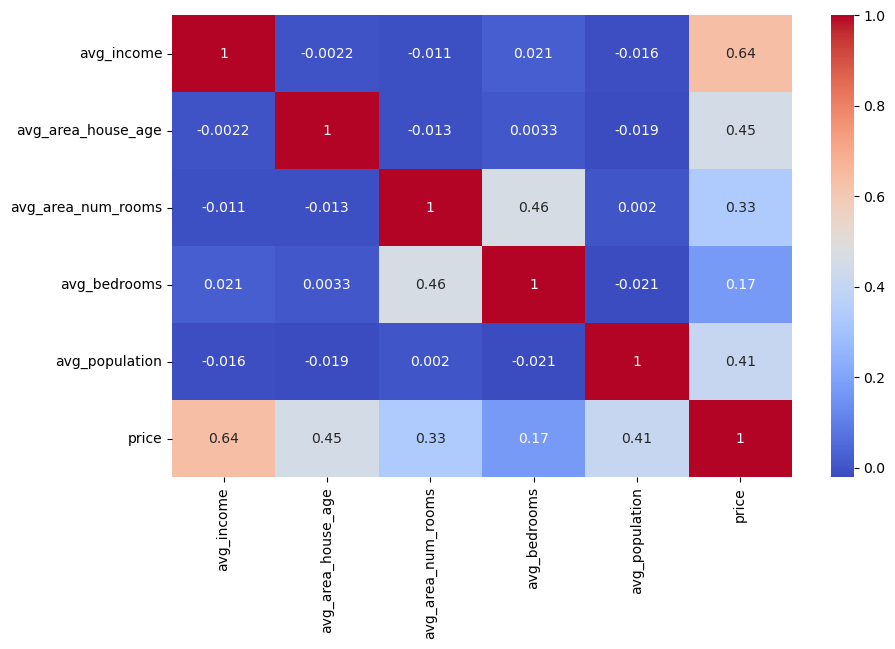

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [35]:
# feature selection and data spliting

from sklearn.model_selection import train_test_split

X = df[['avg_income', 'avg_area_house_age', 'avg_area_num_rooms', 'avg_bedrooms', 'avg_population']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load data
df = pd.read_csv('C:\\Users\\Dhusyath\\Downloads\\PROJECTS_DA\\PROJECTS_DA\\house prediction\\cleaned_house_price_prediction.csv')

# Drop rows with missing values
df.dropna(inplace=True)

# Features and target
X = df[['avg_income', 'avg_area_house_age', 'avg_area_num_rooms', 'avg_bedrooms', 'avg_population']]
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

# Save model
joblib.dump(model, "house_price_model.pkl")


Mean Squared Error: 10631960441.63
R² Score: 0.9173


['house_price_model.pkl']

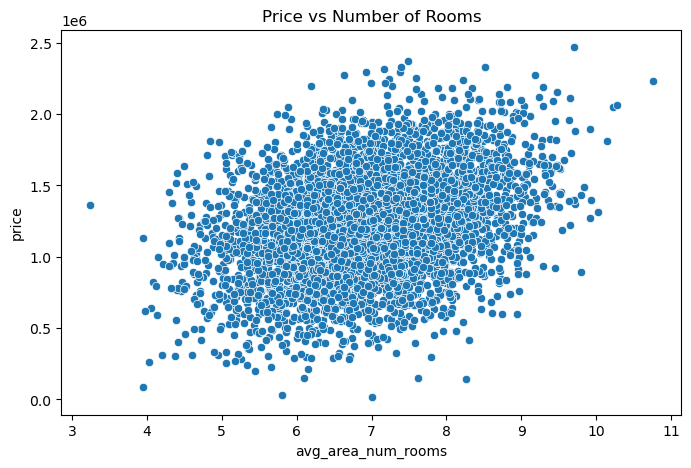

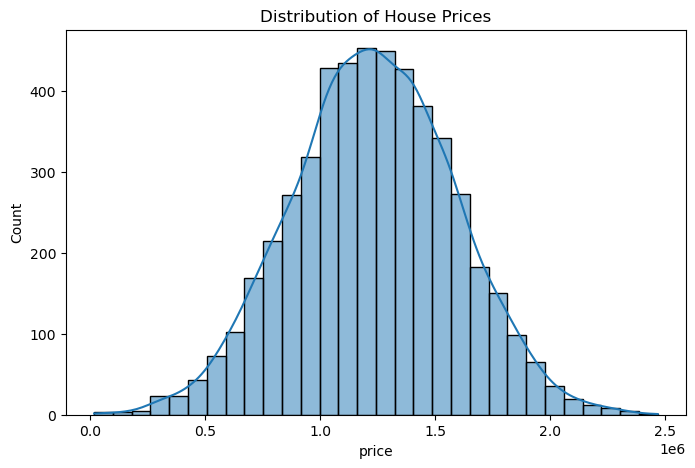

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for price vs number of rooms
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['avg_area_num_rooms'], y=df['price'])
plt.title("Price vs Number of Rooms")
plt.show()

# Histogram to analyze distribution of house prices
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.show()


In [70]:
df.to_csv("cleaned_house_price_prediction.csv", index=False)